In [1]:
!pip install pytesseract pillow pandas matplotlib openai

In [2]:
!apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2026-02-20 144845.png to Screenshot 2026-02-20 144845.png


In [25]:
import pytesseract
from PIL import Image

image = Image.open(list(uploaded.keys())[0])
text = pytesseract.image_to_string(image)

print("Extracted Text:\n")
print(text)

Extracted Text:

 

Payim

PAYMENT RECEIPT

Payment Successful

=340 @

Rupees Three Hundred Forty Only

 

To: Shriram Gujar

From: Manju Rakyan
HDFC Bank - 5175,

UPI Ref ID: 345532033794

Qg 100% SECURE PAYMENTS

Li»



In [26]:
import re

amount_value = None

# Pattern 1: number after "="
match1 = re.search(r'=\s*(\d+)', text)
if match1:
    amount_value = int(match1.group(1))

# Pattern 2: number before "Rupees"
if not amount_value:
    match2 = re.search(r'(\d+)\s*Rupees', text)
    if match2:
        amount_value = int(match2.group(1))

# Pattern 3: Fallback – choose smallest reasonable 3-digit number
if not amount_value:
    numbers = re.findall(r'\d{2,5}', text)
    numbers = [int(x) for x in numbers if 100 <= int(x) <= 5000]
    if numbers:
        amount_value = min(numbers)

print("Detected Amount:", amount_value)

Detected Amount: 340


In [27]:
merchant_match = re.search(r'To:\s*(.*)', text)

if merchant_match:
    merchant = merchant_match.group(1).strip()
else:
    merchant = "Unknown"

print("Merchant:", merchant)

Merchant: Shriram Gujar


In [28]:
import pandas as pd

data = {
    "Merchant": [merchant],
    "Amount": [amount_value],
    "Category": ["Transfer"]
}

df = pd.DataFrame(data)
df

,Merchant,Amount,Category
0,Shriram Gujar,340,Transfer


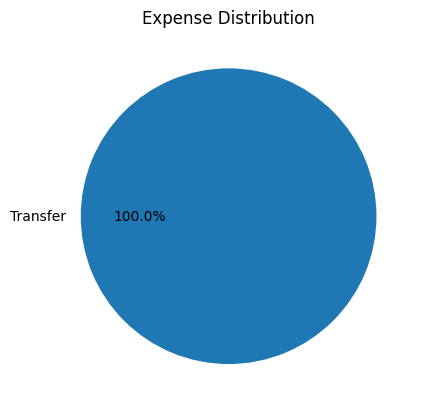

In [29]:
import matplotlib.pyplot as plt

category_counts = df["Category"].value_counts()

category_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Expense Distribution")
plt.ylabel("")
plt.show()